In [2]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
from astropy.table import Table, vstack
from astroML.plotting import scatter_contour

Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')

In [54]:
job1 = Gaia.launch_job_async("SELECT TOP 10000000 \
ra,dec,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag, pmra, pmdec \
FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),BOX('ICRS',30,0,60,2.6))=1 AND \
phot_g_mean_mag>=12 AND phot_g_mean_mag<22 ORDER BY phot_g_mean_mag", dump_to_file=True)
print (job1)

Launched query: 'SELECT TOP 10000000 ra,dec,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag, pmra, pmdec FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),BOX('ICRS',30,0,60,2.6))=1 AND phot_g_mean_mag>=12 AND phot_g_mean_mag<22 ORDER BY phot_g_mean_mag'
Retrieving async. results...
Jobid: 1528146301550O
Phase: None
Owner: None
Output file: async_20180604140501.vot
Results: None


In [56]:
job2 = Gaia.launch_job_async("SELECT TOP 10000000 \
ra,dec,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag, pmra, pmdec \
FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),BOX('ICRS',330,0,60,2.6))=1 AND \
phot_g_mean_mag>=12 AND phot_g_mean_mag<22 ORDER BY phot_g_mean_mag", dump_to_file=True)
print (job2)

Launched query: 'SELECT TOP 10000000 ra,dec,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag, pmra, pmdec FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),BOX('ICRS',330,0,60,2.6))=1 AND phot_g_mean_mag>=12 AND phot_g_mean_mag<22 ORDER BY phot_g_mean_mag'
Retrieving async. results...
Jobid: 1528146733259O
Phase: None
Owner: None
Output file: async_20180604141213.vot
Results: None


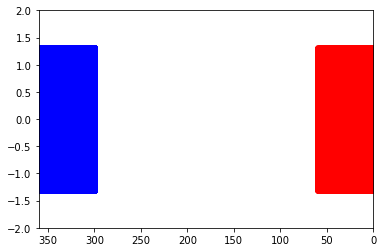

In [60]:
# sanity test 
r1 = job1.get_results()
plt.scatter(r1['ra'], r1['dec'], color='r', alpha=0.3)
r2 = job2.get_results()
plt.scatter(r2['ra'], r2['dec'], color='b', alpha=0.3)
plt.xlim(360, 0)
plt.ylim(-2,2)
plt.show()

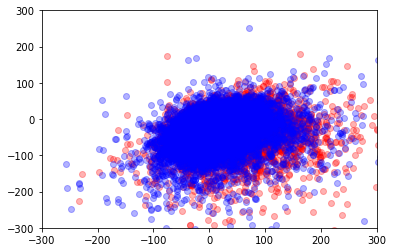

In [62]:
# sanity test 
plt.scatter(r1['pmra'], r1['pmdec'], color='r', alpha=0.3)
plt.scatter(r2['pmra'], r2['pmdec'], color='b', alpha=0.3)
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.show()

In [63]:
t1 = Table.read('async_20180604140501.vot', format='votable')
t2 = Table.read('async_20180604141213.vot', format='votable')
Stripe82 = np.hstack([t1, t2])

In [64]:
fname = 'Stripe82_GaiaDR2.dat'
ra = Stripe82['ra']
dec = Stripe82['dec']
nobs = Stripe82['phot_g_n_obs']
Gmag = Stripe82['phot_g_mean_mag']
flux = Stripe82['phot_g_mean_flux']
fluxErr = Stripe82['phot_g_mean_flux_error']
pmra = Stripe82['pmra']
pmdec = Stripe82['pmdec']
np.savetxt(fname, zip(ra, dec, nobs, Gmag, flux, fluxErr, pmra, pmdec))
print(Stripe82.size, ' Gaia DR2 sources saved to file Stripe82_GaiaDR2.dat')

(2397440, ' Gaia DR2 sources saved to file Stripe82_GaiaDR2.dat')
